In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

In [6]:
np.random.seed(42)
X = np.random.rand(50, 2) * 10

In [7]:
Z = linkage(X, method='complete', metric='euclidean')

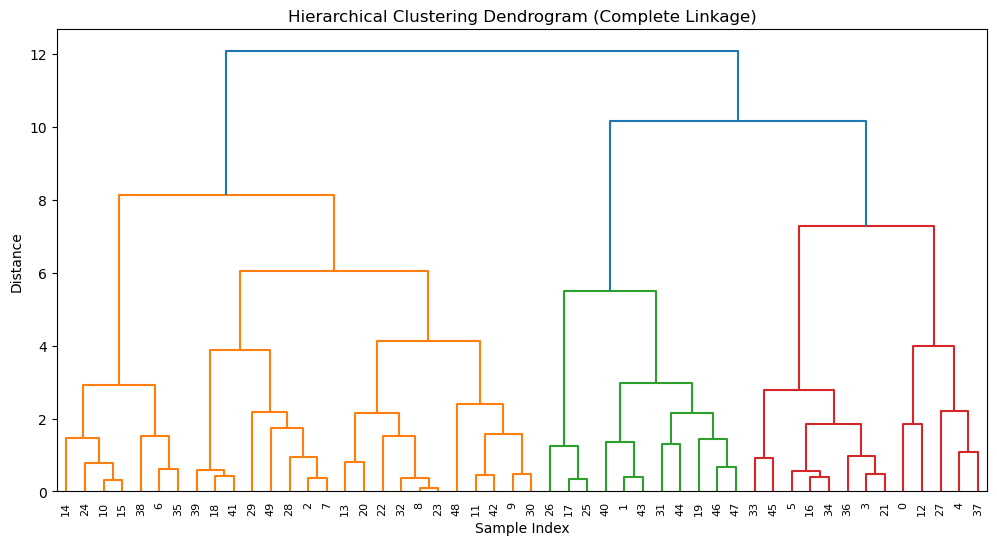

In [8]:
plt.figure(figsize=(12,6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

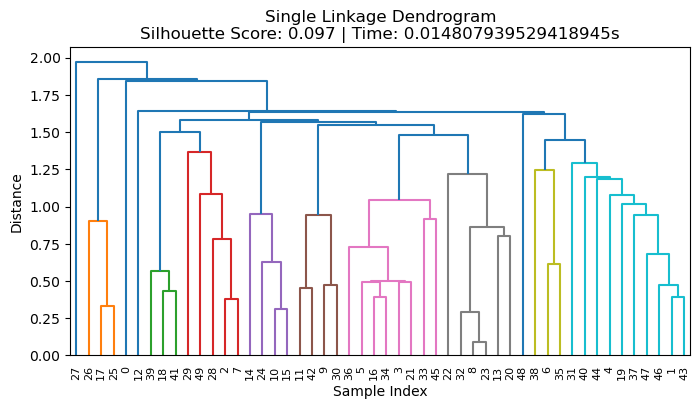

Method: single
Silhouette_Score: 0.097
Time taken: 0.014807939529418945 seconds
----------------------------------------


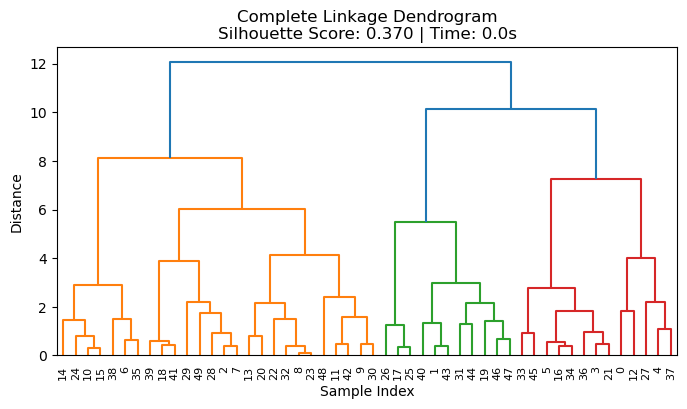

Method: complete
Silhouette_Score: 0.370
Time taken: 0.0 seconds
----------------------------------------


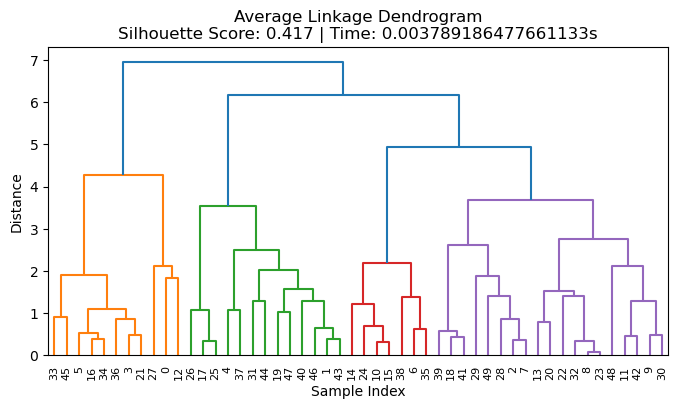

Method: average
Silhouette_Score: 0.417
Time taken: 0.003789186477661133 seconds
----------------------------------------


In [10]:
linkage_methods = ['single', 'complete', 'average']
n_clusters = 3

for method in linkage_methods:
    start_time = time.time()
    Z = linkage(X, method=method, metric='euclidean')
    labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    score = silhouette_score(X,labels)
    elapsed_time = time.time() - start_time

    plt.figure(figsize=(8,4))
    dendrogram(Z)
    plt.title(f'{method.capitalize()} Linkage Dendrogram\nSilhouette Score: {score:.3f} | Time: {elapsed_time}s')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

    print(f'Method: {method}')
    print(f'Silhouette_Score: {score:.3f}')
    print(f'Time taken: {elapsed_time} seconds')
    print("-" * 40)

Method: Single
Cluster Label: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 3 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


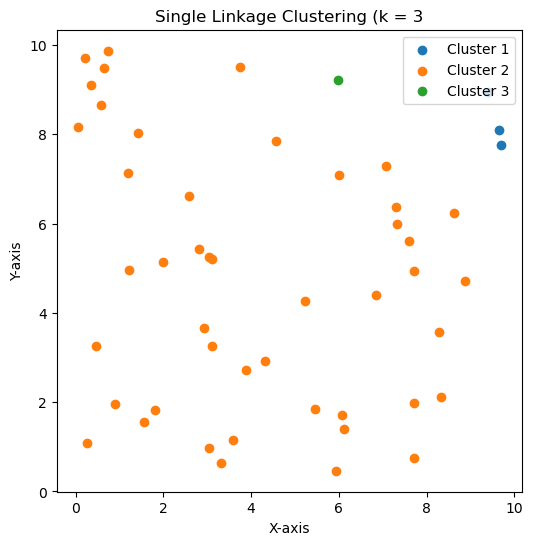

Method: Complete
Cluster Label: [3 2 1 3 3 3 1 1 1 1 1 1 3 1 1 1 3 2 1 2 1 3 1 1 1 2 2 3 1 1 1 2 1 3 3 1 3
 3 1 1 2 1 1 2 2 3 2 2 1 1]


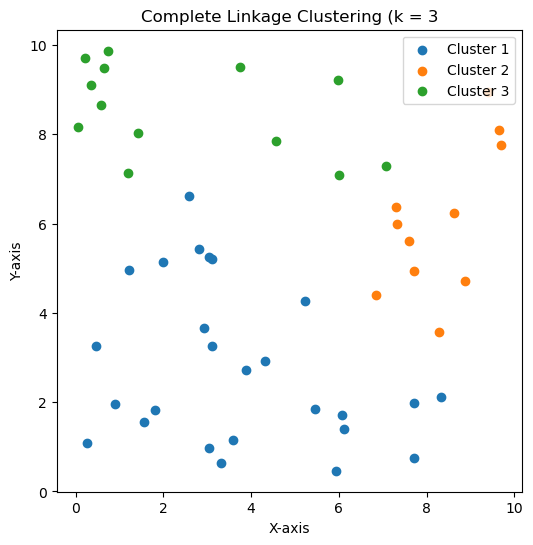

Method: Average
Cluster Label: [1 2 3 1 2 1 3 3 3 3 3 3 1 3 3 3 1 2 3 2 3 1 3 3 3 2 2 1 3 3 3 2 3 1 1 3 1
 2 3 3 2 3 3 2 2 1 2 2 3 3]


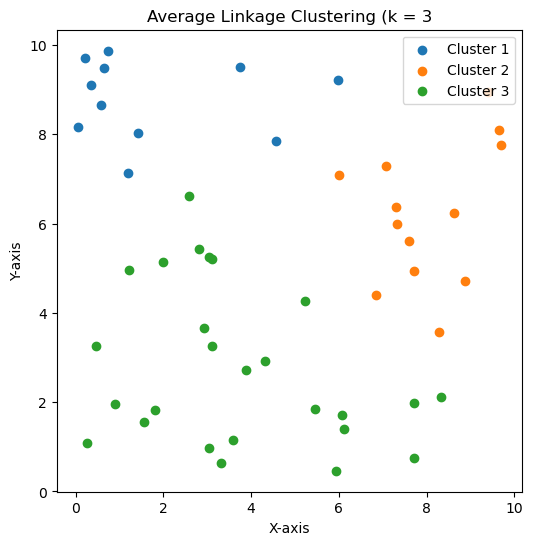

In [11]:
linkage_methods = ['single', 'complete', 'average']
n_clusters = 3

for link in linkage_methods:
    Z = linkage(X, method=link, metric='euclidean')
    
    labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    print(f'Method: {link.capitalize()}\nCluster Label: {labels}')

    plt.figure(figsize=(6,6))
    for cluster in np.unique(labels):
        plt.scatter(X[labels == cluster, 0], X[labels == cluster, 1], label=f'Cluster {cluster}')
    plt.title(f'{link.capitalize()} Linkage Clustering (k = {n_clusters}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(loc='upper right')
    plt.show()